<a href="https://colab.research.google.com/github/akhildesigns07/DeepLearning/blob/main/DeepLearningLab_4_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 344s 4s/step - accuracy: 0.5793 - loss: 1.0854 - val_accuracy: 0.7895 - val_loss: 0.5616
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 373s 4s/step - accuracy: 0.8376 - loss: 0.4825 - val_accuracy: 0.8421 - val_loss: 0.4767
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.8652 - loss: 0.3990 - val_accuracy: 0.8421 - val_loss: 0.4681
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.8856 - loss: 0.3467 - val_accuracy: 0.8475 - val_loss: 0.4399
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - accuracy: 0.9081 - loss: 0.2982 - val_accuracy: 0.8475 - val_loss: 0.4180
18/18 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8588 - loss: 0.3562
Test Accuracy: 0.8545


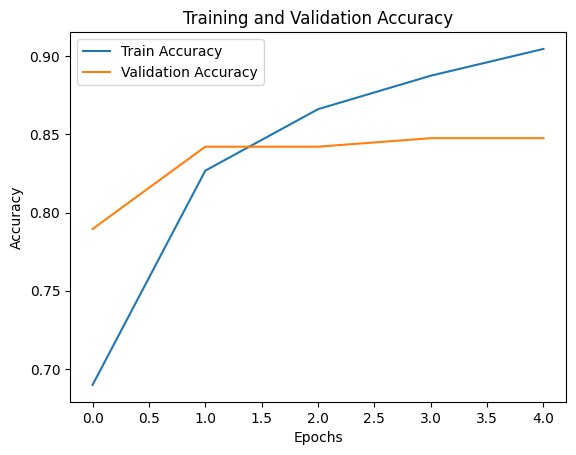

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds

# Load and split the tf_flowers dataset
(raw_train, raw_val, raw_test), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[70%:85%]", "train[85%:]"],
    as_supervised=True,
    with_info=True
)

# Pre-process and resize the images
IMG_SIZE = (150, 150)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

train = raw_train.map(preprocess).batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val = raw_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test = raw_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Load the pre-trained Xception model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers for transfer learning
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(ds_info.features["label"].num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(train, validation_data=val, epochs=5)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualize training results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
